<a href="https://colab.research.google.com/github/Sampath844/MLAssignment29-07-2024/blob/main/MachineLearningKNNassignment3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
from scipy.sparse import hstack
import statistics as st
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [ ]:
data = pd.read_csv('train.csv')
data['text'] = data['Prompt'] + " " + data["Answer"]
data = data[['text','Target']]
data.fillna(" ",inplace=True)

In [13]:
#vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(data['text'])
# y = data['Target']

In [ ]:
X_dense = X.toarray()

In [6]:
# df_features = pd.DataFrame(X_dense, columns=vectorizer.get_feature_names_out())
# df_features['Target'] = y.values
# df_features.to_csv('features.csv', index=False)
df_features = pd.read_csv("/content/drive/MyDrive/200features.csv")

In [7]:
df_features.mean(axis = 0) #mean of the data
#standard deviation
df_features.std(axis = 0)


,0
about,0.054776
after,0.043836
ai,0.035087
all,0.051353
also,0.042786
...,...
years,0.039908
yes,0.061146
you,0.088298
your,0.086537


In [8]:
df1 = df_features.iloc[0]

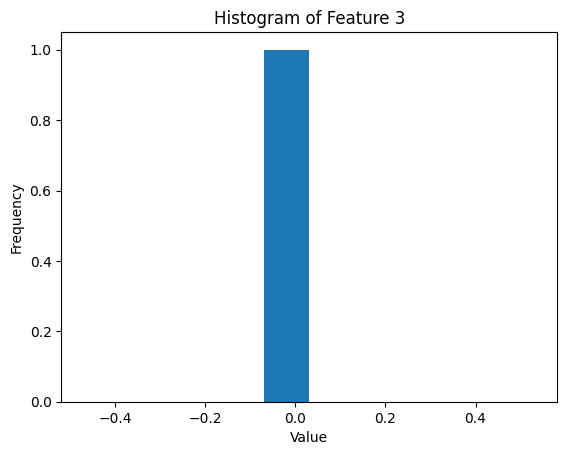

In [9]:
#A2
plt.hist(df_features.iloc[0].iloc[2]) #3rd feature of the xl sheet
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature 3')
plt.show()


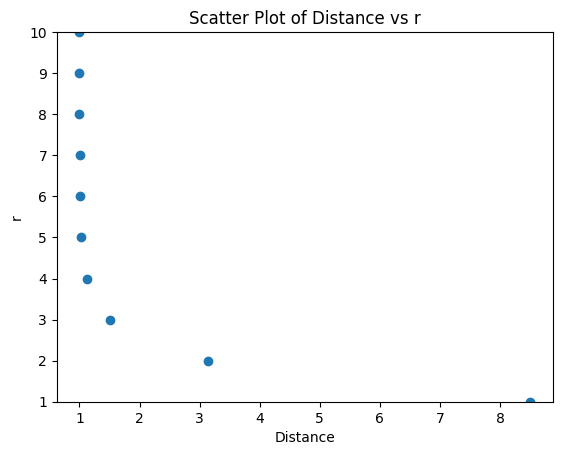

In [10]:
#A3
df1 = df_features.iloc[0]
df2 = df_features.iloc[1]
r = 1
dist = 0
newl = []
newl2 = []
for j in range (10):
  for i in range(len(df1)):
    dist += abs(((df1.iloc[i] - df2.iloc[i])**r))
  dist = dist**(1/r)
  newl2.append(r)
  r+=1
  newl.append(dist)
plt.scatter(x=newl,y=newl2)
plt.xlabel('Distance')
plt.ylabel('r')
plt.title('Scatter Plot of Distance vs r')
plt.ylim(1, 10)
plt.show()






In [15]:
#A4
from sklearn.model_selection import train_test_split
X = df_features.drop('Target',axis=1)
Y = df_features["Target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
neigh.score(X_test,Y_test) #accuracy of KNN


0.9460754943079689

In [18]:
y_pred = neigh.predict(X_test)


In [19]:
from sklearn.metrics import confusion_matrix,classification_report #A9
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4759
           1       0.39      0.15      0.22       248

    accuracy                           0.95      5007
   macro avg       0.67      0.57      0.59      5007
weighted avg       0.93      0.95      0.93      5007

[[4700   59]
 [ 211   37]]


In [20]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)
for i in range (1,11):
  newneigh = KNeighborsClassifier(n_neighbors=i)
  newneigh.fit(X_train,Y_train)
  if(newneigh.score(X_test,Y_test) > neigh.score(X_test,Y_test)):
    print(f"{i}th neighbor is greater")

2th neighbor is greater
4th neighbor is greater
5th neighbor is greater
6th neighbor is greater
7th neighbor is greater
8th neighbor is greater
9th neighbor is greater
10th neighbor is greater


Text(0.5, 1.0, 'Accuracy vs Number of Neighbors')

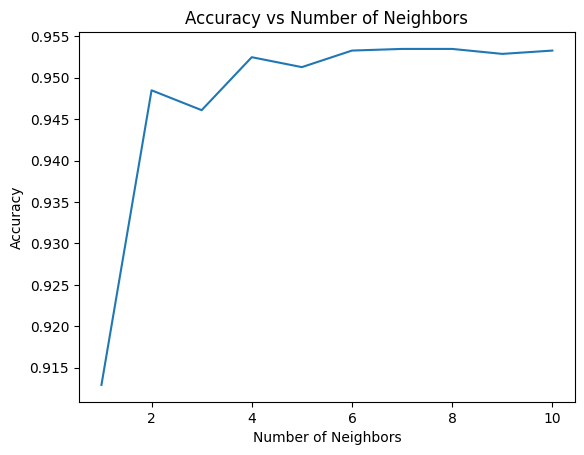

In [21]:
newl = []
for i in range(1,11):
  newneigh = KNeighborsClassifier(n_neighbors=i)
  newneigh.fit(X_train,Y_train)
  newl.append(newneigh.score(X_test,Y_test))
plt.plot(range(1,11),newl)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')